In [11]:
import glob
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
df1 = pd.read_csv(r'C:\Users\Vasudevan\Downloads\ResaleFlatPricesBasedonApprovalDate19901999.csv')
df2 = pd.read_csv(r'C:\Users\Vasudevan\Downloads\ResaleFlatPricesBasedonApprovalDate2000Feb2012.csv')
df3 = pd.read_csv(r'C:\Users\Vasudevan\Downloads\ResaleFlatPricesBasedonRegistrationDateFromMar2012toDec2014.csv')
df4 = pd.read_csv(r'C:\Users\Vasudevan\Downloads\ResaleFlatPricesBasedonRegistrationDateFromJan2015toDec2016.csv')
df5 = pd.read_csv(r'C:\Users\Vasudevan\Downloads\ResaleflatpricesbasedonregistrationdatefromJan2017onwards.csv')

In [13]:
df=pd.concat([df1,df2,df3,df4,df5],ignore_index=True)

In [14]:
df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,NaN
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,NaN
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,NaN
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,NaN


In [15]:
df.shape

(929713, 11)

In [16]:
df.isnull().sum()

month                       0
town                        0
flat_type                   0
block                       0
street_name                 0
storey_range                0
floor_area_sqm              0
flat_model                  0
lease_commence_date         0
resale_price                0
remaining_lease        709050
dtype: int64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 929713 entries, 0 to 929712
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                929713 non-null  object 
 1   town                 929713 non-null  object 
 2   flat_type            929713 non-null  object 
 3   block                929713 non-null  object 
 4   street_name          929713 non-null  object 
 5   storey_range         929713 non-null  object 
 6   floor_area_sqm       929713 non-null  float64
 7   flat_model           929713 non-null  object 
 8   lease_commence_date  929713 non-null  int64  
 9   resale_price         929713 non-null  float64
 10  remaining_lease      220663 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 78.0+ MB


In [18]:
df.describe()

,floor_area_sqm,lease_commence_date,resale_price
count,929713.000000,929713.000000,9.297130e+05
mean,95.690063,1988.302756,3.215683e+05
std,25.820809,10.690327,1.712095e+05
min,28.000000,1966.000000,5.000000e+03
25%,73.000000,1981.000000,1.938000e+05
50%,93.000000,1986.000000,2.980000e+05
75%,113.000000,1996.000000,4.180000e+05
max,307.000000,2020.000000,1.588000e+06


In [19]:
df.skew(numeric_only= True)

floor_area_sqm         0.365915
lease_commence_date    0.650321
resale_price           0.948364
dtype: float64

In [20]:
df['month'] = pd.to_datetime(df['month'])

# Extract the year and month into separate columns
df['year'] = df['month'].dt.year
df['month'] = df['month'].dt.month

In [21]:
# Calculate the remaining lease
df['remaining_lease'] = df['lease_commence_date'] + 99 - df['year']

In [22]:
df['flat_type'] = df['flat_type'].str.replace('MULTI-GENERATION', 'MULTI GENERATION')

In [23]:
df['flat_type'].value_counts()

flat_type
4 ROOM              353450
3 ROOM              296604
5 ROOM              196057
EXECUTIVE            69841
2 ROOM               11913
1 ROOM                1304
MULTI GENERATION       544
Name: count, dtype: int64

In [24]:
df['flat_model'] = df['flat_model'].str.lower()
df['flat_model'] = df['flat_model'].str.title()
     

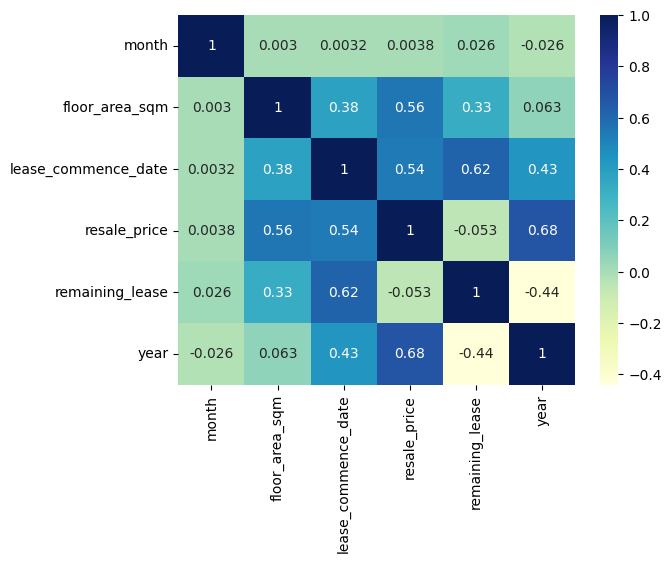

In [25]:
sns.heatmap(df.corr(numeric_only=True),cmap="YlGnBu", annot=True)
plt.show()

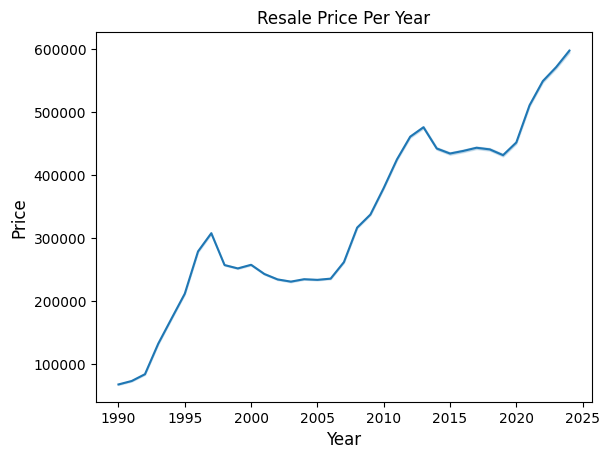

In [26]:
sns.lineplot(data = df, x ='year', y = 'resale_price')
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Price',fontsize = 12)
plt.title("Resale Price Per Year")
plt.show()

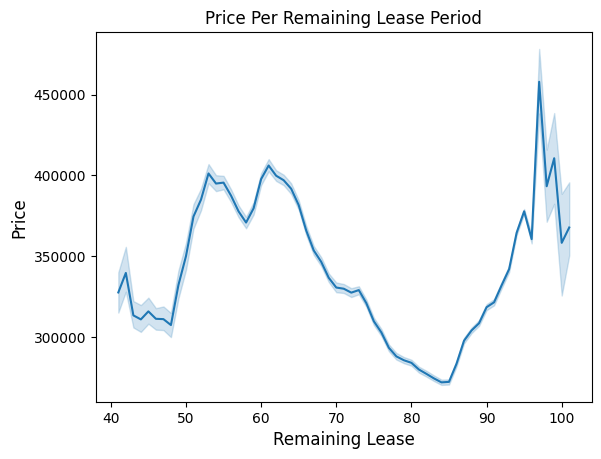

In [27]:
sns.lineplot(data = df, x ='remaining_lease', y = 'resale_price')
plt.xlabel('Remaining Lease', fontsize = 12)
plt.ylabel('Price',fontsize = 12)
plt.title("Price Per Remaining Lease Period")
plt.show()

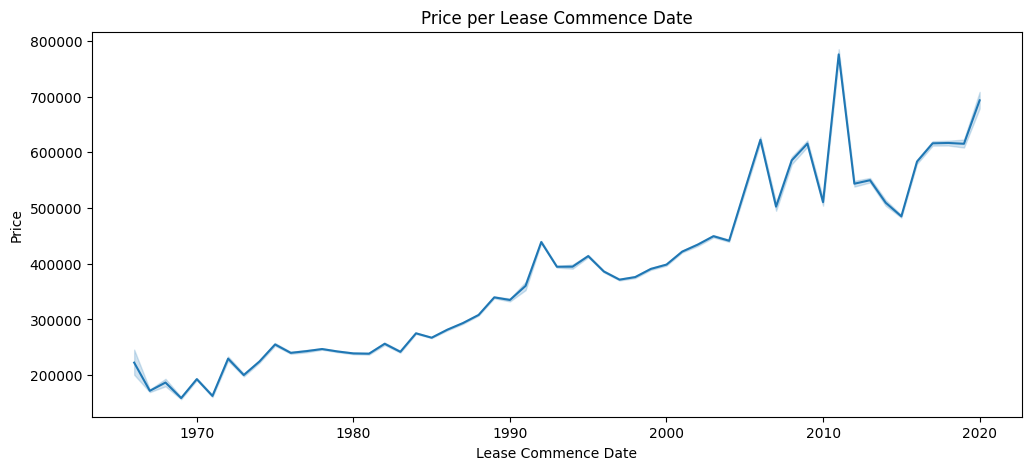

In [28]:
plt.figure(figsize=(12,5))
sns.lineplot(x='lease_commence_date', y='resale_price', data=df)
plt.xlabel('Lease Commence Date')
plt.ylabel('Price')
plt.title('Price per Lease Commence Date')
plt.show()
     

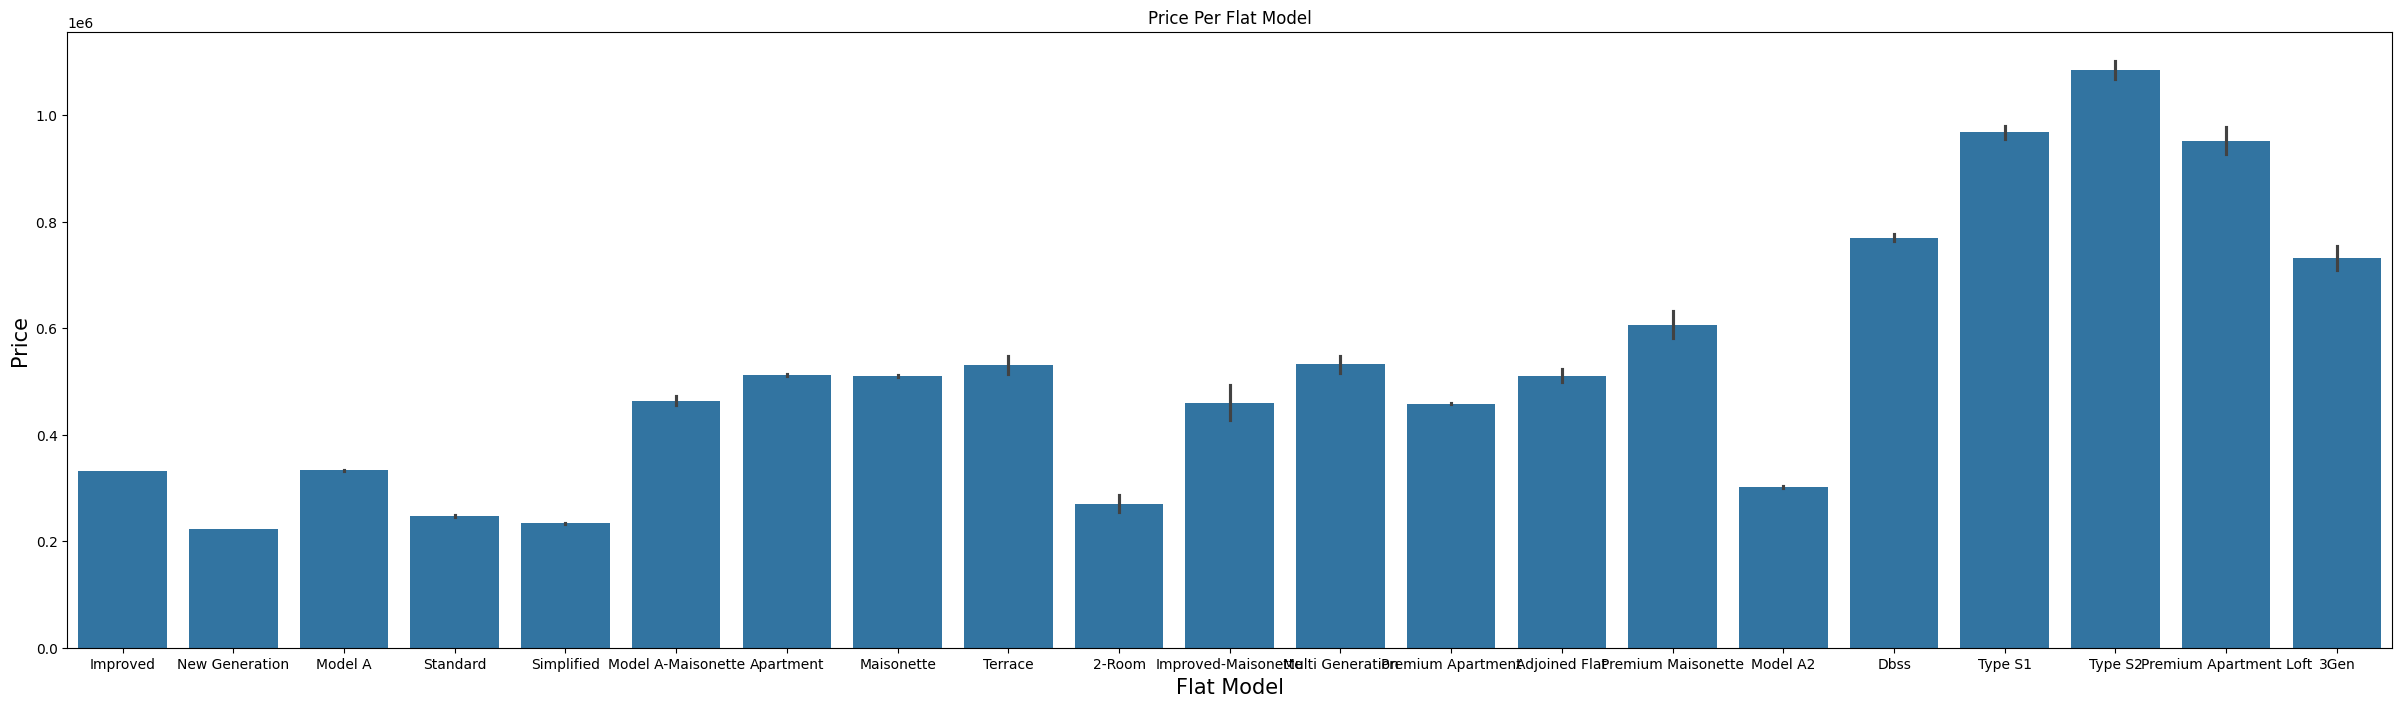

In [29]:
plt.figure(figsize=(30,8))
sns.barplot(x='flat_model',y = 'resale_price', data=df)
plt.xlabel('Flat Model', fontsize = 15)
plt.ylabel('Price',fontsize = 15)
plt.title("Price Per Flat Model")
plt.show()

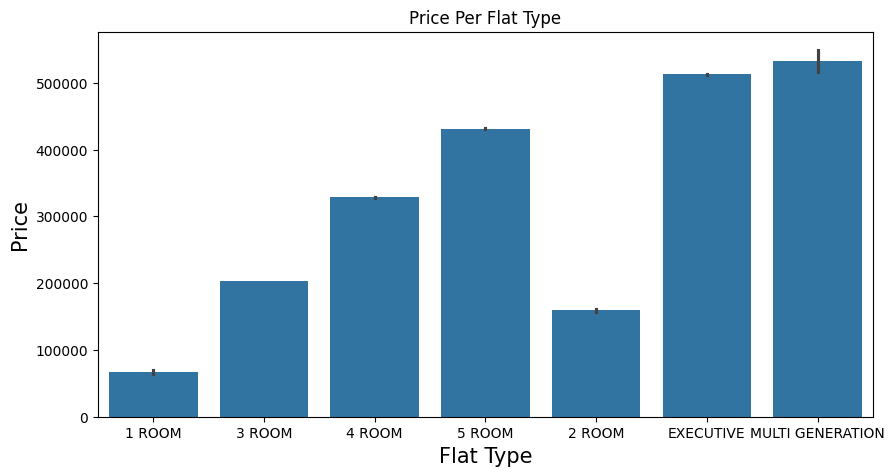

In [30]:
plt.figure(figsize=(10,5))
sns.barplot(data = df, x ='flat_type',y = 'resale_price')
plt.xlabel('Flat Type', fontsize = 15)
plt.ylabel('Price', fontsize = 15)
plt.title('Price Per Flat Type')
plt.show()

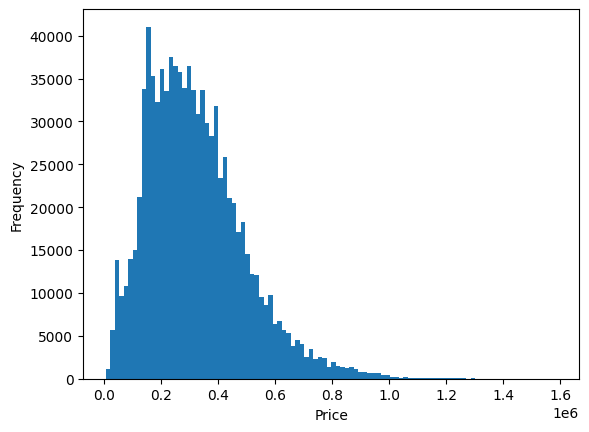

In [31]:
plt.hist(df['resale_price'], bins=100)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()
     

In [32]:
# Calculate the average of the upper and lower bounds and create a new column 'storey_range_avg'
df['storey_range_avg'] = df['storey_range'].apply(lambda x: (int(x.split(' TO ')[0]) + int(x.split(' TO ')[1])) / 2)

# Drop the original 'storey_range' column
df.drop(columns=['storey_range'], inplace=True)

# Rename the 'storey_range_avg' column to 'storey_range'
df.rename(columns={'storey_range_avg': 'storey_range'}, inplace=True)

In [33]:
# Create a mapping from flat_type to integer values
flat_type_mapping = {
    '1 ROOM': 1,
    '2 ROOM': 2,
    '3 ROOM': 3,
    '4 ROOM': 4,
    '5 ROOM': 5,
    'EXECUTIVE': 6,
    'MULTI GENERATION' : 7
}

# Apply the mapping to the 'flat_type' column
df['flat_type_encoded'] = df['flat_type'].map(flat_type_mapping)

# You can drop the original 'flat_type' column if needed
df.drop(columns=['flat_type'], inplace=True)

# If you want to rename the new column to 'flat_type', you can do so
df.rename(columns={'flat_type_encoded': 'flat_type'}, inplace=True)
     

In [34]:
df.drop(['street_name','block'],axis=1, inplace = True)

In [35]:
df2 = pd.get_dummies(df, columns=['town', 'flat_model'])

In [36]:
from sklearn.model_selection import train_test_split


In [37]:
# Define features (X) and target (y)
X = df2.drop("resale_price", axis=1)
y = df2["resale_price"]

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
     

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np


In [39]:
# Initialize the models
linear_reg_model = LinearRegression()
decision_tree_model = DecisionTreeRegressor()
random_forest_model = RandomForestRegressor()

# Train the models on the training data
linear_reg_model.fit(X_train, y_train)
decision_tree_model.fit(X_train, y_train)
random_forest_model.fit(X_train, y_train)

# Predict on the validation set for each model
linear_reg_pred = linear_reg_model.predict(X_val)
decision_tree_pred = decision_tree_model.predict(X_val)
random_forest_pred = random_forest_model.predict(X_val)

# Calculate regression metrics for each model
linear_reg_mae = mean_absolute_error(y_val, linear_reg_pred)
linear_reg_mse = mean_squared_error(y_val, linear_reg_pred)
linear_reg_rmse = np.sqrt(linear_reg_mse)
linear_reg_r2 = r2_score(y_val, linear_reg_pred)

decision_tree_mae = mean_absolute_error(y_val, decision_tree_pred)
decision_tree_mse = mean_squared_error(y_val, decision_tree_pred)
decision_tree_rmse = np.sqrt(decision_tree_mse)
decision_tree_r2 = r2_score(y_val, decision_tree_pred)

random_forest_mae = mean_absolute_error(y_val, random_forest_pred)
random_forest_mse = mean_squared_error(y_val, random_forest_pred)
random_forest_rmse = np.sqrt(random_forest_mse)
random_forest_r2 = r2_score(y_val, random_forest_pred)

# Display the results for all three models
print("Linear Regression Results:")
print(f"Mean Absolute Error: {linear_reg_mae}")
print(f"Mean Squared Error: {linear_reg_mse}")
print(f"Root Mean Squared Error: {linear_reg_rmse}")
print(f"R2 Score: {linear_reg_r2}")
print()

print("Decision Tree Results:")
print(f"Mean Absolute Error: {decision_tree_mae}")
print(f"Mean Squared Error: {decision_tree_mse}")
print(f"Root Mean Squared Error: {decision_tree_rmse}")
print(f"R2 Score: {decision_tree_r2}")
print()

print("Random Forest Results:")
print(f"Mean Absolute Error: {random_forest_mae}")
print(f"Mean Squared Error: {random_forest_mse}")
print(f"Root Mean Squared Error: {random_forest_rmse}")
print(f"R2 Score: {random_forest_r2}")


Linear Regression Results:
Mean Absolute Error: 53152.43537094701
Mean Squared Error: 4793676630.843154
Root Mean Squared Error: 69236.38227726196
R2 Score: 0.8372463609239184

Decision Tree Results:
Mean Absolute Error: 21240.107869732063
Mean Squared Error: 1047803246.6601428
Root Mean Squared Error: 32369.789104350722
R2 Score: 0.9644252617432653

Random Forest Results:
Mean Absolute Error: 16793.958772695558
Mean Squared Error: 627541214.5143529
Root Mean Squared Error: 25050.772732878977
R2 Score: 0.9786938869269389


In [40]:
# Create and train the Random Forest model using your training data
random_forest_model = RandomForestRegressor()
random_forest_model.fit(X_train, y_train)
     

RandomForestRegressor()

In [41]:
import pickle
with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(random_forest_model, file)

In [42]:
# Define a function to take user input
def get_user_input():
    user_input = {}

    user_input['month'] = int(input("Enter the month: "))
    user_input['floor_area_sqm'] = float(input("Enter the floor area in square meters: "))
    user_input['lease_commence_date'] = int(input("Enter the lease commencement year: "))
    user_input['remaining_lease'] = None
    user_input['year'] = int(input("Enter the year: "))
    user_input['remaining_lease'] = user_input['lease_commence_date'] + 99 - user_input['year']

    # Calculate remaining lease based on user input
    #user_input['remaining_lease'] = user_input['lease_commence_date'] + 99 - user_input['year']

    user_input['storey_range'] = float(input("Enter the storey range: "))
    user_input['flat_type'] = int(input("Enter the flat type (e.g., 1, 2, 3, etc.): "))

    town = input("Enter the town (e.g., 'BEDOK', 'TAMPINES', etc.): ")
    flat_model = input("Enter the flat model (e.g., 'Improved', 'New Generation', etc.): ")

    # Set all other 'town' columns to 0
    all_town_columns = [
        'town_ANG MO KIO', 'town_BEDOK', 'town_BISHAN', 'town_BUKIT BATOK', 'town_BUKIT MERAH',
        'town_BUKIT PANJANG', 'town_BUKIT TIMAH', 'town_CENTRAL AREA', 'town_CHOA CHU KANG',
        'town_CLEMENTI', 'town_GEYLANG', 'town_HOUGANG', 'town_JURONG EAST', 'town_JURONG WEST',
        'town_KALLANG/WHAMPOA', 'town_LIM CHU KANG', 'town_MARINE PARADE', 'town_PASIR RIS',
        'town_PUNGGOL', 'town_QUEENSTOWN', 'town_SEMBAWANG', 'town_SENGKANG', 'town_SERANGOON',
        'town_TAMPINES', 'town_TOA PAYOH', 'town_WOODLANDS', 'town_YISHUN'
    ]

    for town_column in all_town_columns:
        if town_column != f'town_{town}':
            user_input[town_column] = 0
        else:
            user_input[f'town_{town}'] = 1

    # Set all other 'flat_model' columns to 0
    all_flat_model_columns = [
        'flat_model_2-Room', 'flat_model_3Gen', 'flat_model_Adjoined Flat', 'flat_model_Apartment',
        'flat_model_Dbss', 'flat_model_Improved', 'flat_model_Improved-Maisonette',
        'flat_model_Maisonette', 'flat_model_Model A', 'flat_model_Model A-Maisonette',
        'flat_model_Model A2', 'flat_model_Multi Generation', 'flat_model_New Generation',
        'flat_model_Premium Apartment', 'flat_model_Premium Apartment Loft',
        'flat_model_Premium Maisonette', 'flat_model_Simplified', 'flat_model_Standard',
        'flat_model_Terrace', 'flat_model_Type S1', 'flat_model_Type S2'
    ]

    for flat_model_column in all_flat_model_columns:
        if flat_model_column != f'flat_model_{flat_model}':
            user_input[flat_model_column] = 0
        else:
            user_input[f'flat_model_{flat_model}'] = 1

    return user_input
     

In [43]:
# Get user input
user_input_data = get_user_input()

# Create a DataFrame from the user input
user_input_df = pd.DataFrame([user_input_data])

# Use the model to make predictions
predicted_prices = random_forest_model.predict(user_input_df)

# Print the predicted resale price
print("Predicted Resale Price:", predicted_prices[0])